<a href="https://colab.research.google.com/github/Saksham0905/dataanalytics/blob/main/retailssales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv('/content/retail_sales_dataset.csv')
print("Data Loaded Successfully.\n")
print(df.head())
print("\nDataset Info:")
print(df.info())

Data Loaded Successfully.

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 


In [ ]:

print("\nMissing values:\n", df.isnull().sum())
df.dropna(inplace=True)

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

print("\nDescriptive Statistics:\n", df.describe())


Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Descriptive Statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price pe

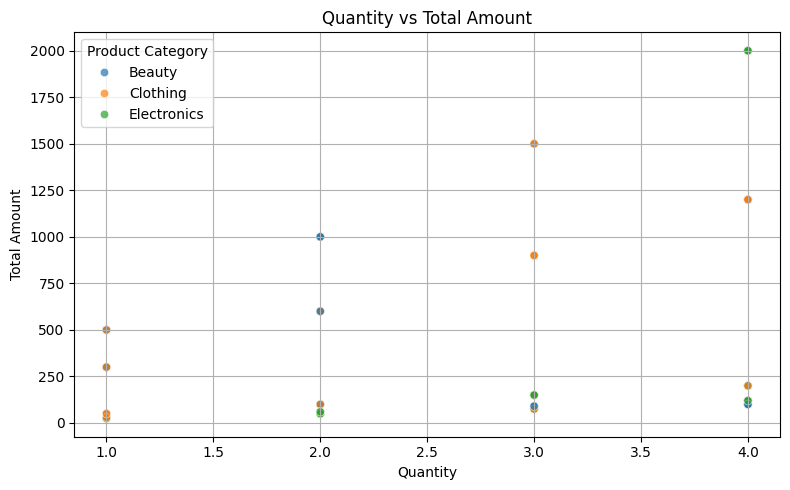

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', alpha=0.7)
plt.title('Quantity vs Total Amount')
plt.grid()
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1920913107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_spending.index, y=gender_spending.values, palette='coolwarm')


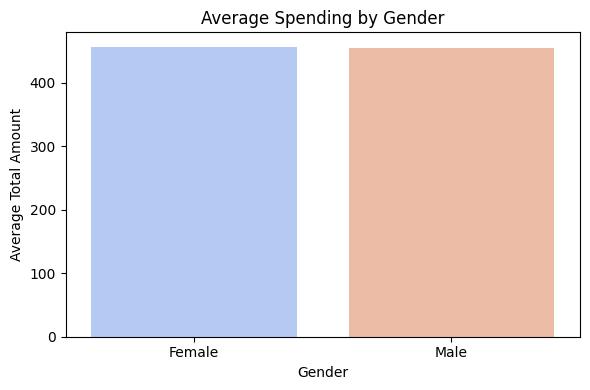

In [ ]:
gender_spending = df.groupby('Gender')['Total Amount'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_spending.index, y=gender_spending.values, palette='coolwarm')
plt.title('Average Spending by Gender')
plt.ylabel('Average Total Amount')
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-3910685158.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
/tmp/ipython-input-12-3910685158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')


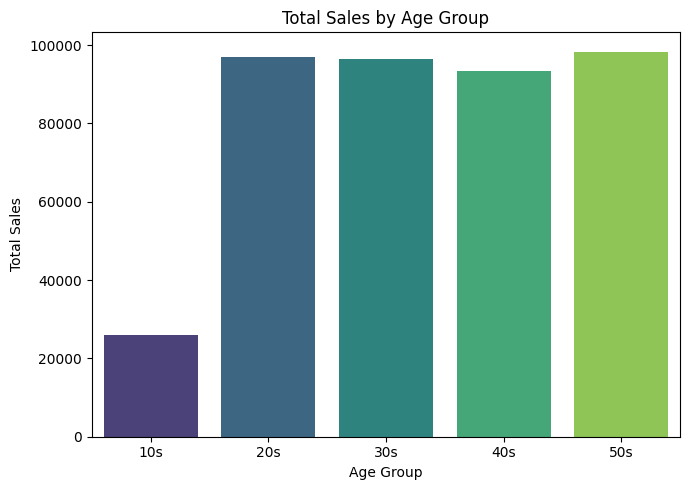

In [ ]:

bins = [10, 20, 30, 40, 50, 60]
labels = ['10s', '20s', '30s', '40s', '50s']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
plt.figure(figsize=(7, 5))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')
plt.title('Total Sales by Age Group')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-3351786620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set2')


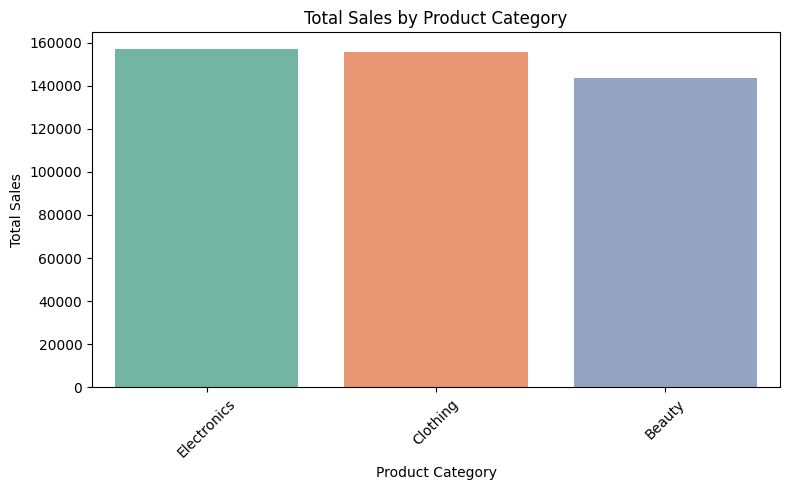

In [ ]:

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set2')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

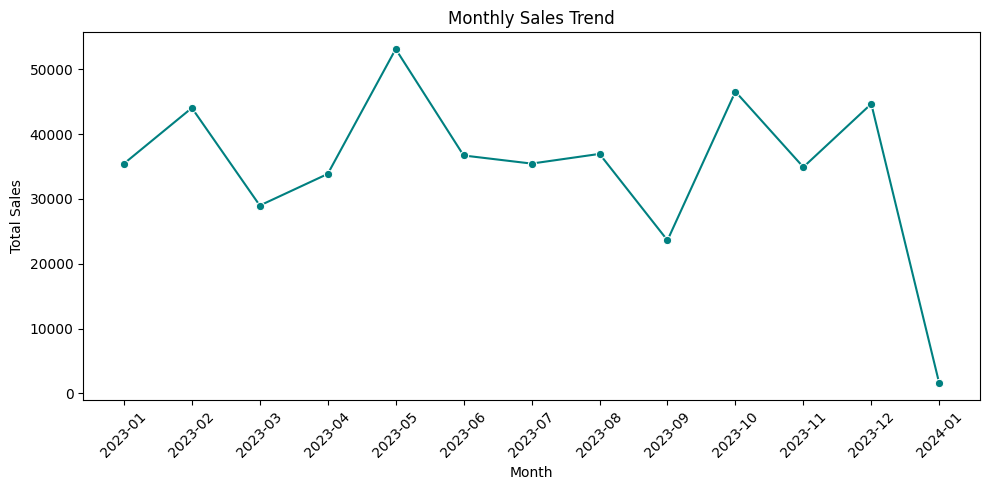

In [ ]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-1325807549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='mako')


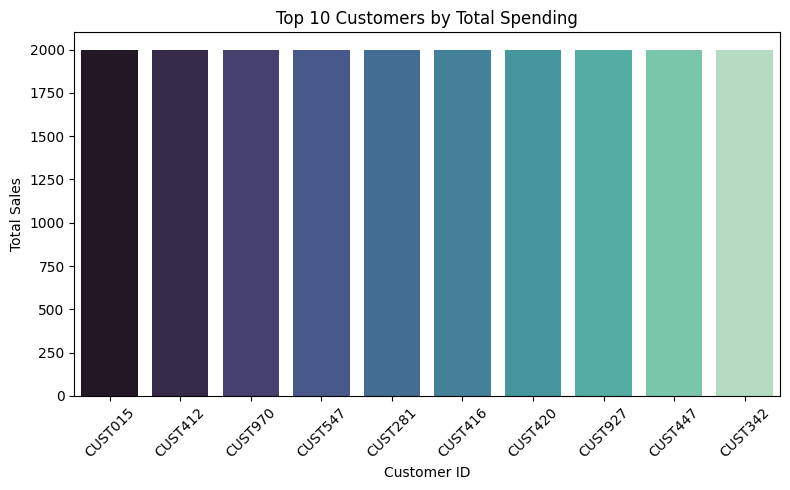

In [ ]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='mako')
plt.title('Top 10 Customers by Total Spending')
plt.ylabel('Total Sales')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

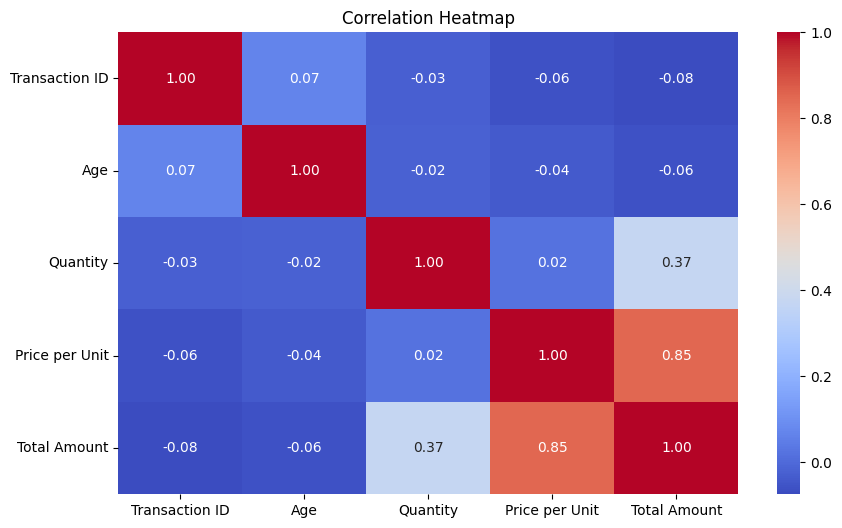

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
print("\n EDA Recommendations Summary")
print("-  Focus on best-selling categories like Clothing, Beauty, and Electronics for marketing and promotions.")
print("-  Female customers spend more per purchase — personalize offers for them.")
print("- Age 30–40 customers generate the most revenue — tailor campaigns to this group.")
print("-  Use monthly sales trends to plan inventory and seasonal promotions.")
print("-  High quantity doesn’t always mean high revenue — review bulk pricing strategies.")
print("-  Top customers contribute significantly — launch loyalty or VIP programs.")
print("-  Low-selling items can be reviewed for bundling, discounts, or removal.")



 EDA Recommendations Summary
-  Focus on best-selling categories like Clothing, Beauty, and Electronics for marketing and promotions.
-  Female customers spend more per purchase — personalize offers for them.
- Age 30–40 customers generate the most revenue — tailor campaigns to this group.
-  Use monthly sales trends to plan inventory and seasonal promotions.
-  High quantity doesn’t always mean high revenue — review bulk pricing strategies.
-  Top customers contribute significantly — launch loyalty or VIP programs.
-  Low-selling items can be reviewed for bundling, discounts, or removal.
